# Modeling Mental Health Illness 


## Overview
The goal of this project is to model depression rates in the U.S. This is useful not only for government agencies, but also to better understand what else is correlated with depression. Having a better forecast for depression will allow the government to allocate additional funds to fight the mental health crises. The final project is useful to any mental health organization or government agency that can advocate or provide support for those with depression.

## Business Understanding
Depression rates in the U.S. have grown significantly in the past two years during Covid. This has a tremendous impact on not only those who experience this disease, it affects those around them, and the Economy as a whole. According to a 2018 study by [PharmaEconomics](https://link.springer.com/article/10.1007/s40273-021-01019-4), depression cost the U.S. economy $326 billion in 2018. This number is rising, not only because of rising rates but because those with the disease are not willing or in many cases unable to receive proper care.

By modeling Depression Rates more accurately, the CDC will be able to more confidently secure increased funding to help improve the lives of those with this disease and therefore ease the economic and psychological burden of U.S. citizens.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 10)
from datetime import datetime as dt

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools


In [2]:
#Load Data
mental_disorder_df = pd.read_csv('data/prevalence-by-mental-and-substance-use-disorder.csv')

In [3]:
#View Data
mental_disorder_df

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711


In [4]:
#Isolate only the U.S. Data
us_df = mental_disorder_df.loc[mental_disorder_df['Entity'] == 'United States']
us_df

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
6330,United States,USA,1990,0.467115,0.649644,0.433047,5.617003,2.281317,4.068695,3.111360
6331,United States,USA,1991,0.472488,0.651606,0.450069,5.636548,2.316009,4.196610,3.022482
6332,United States,USA,1992,0.477502,0.653518,0.465582,5.661951,2.349570,4.323224,2.937071
6333,United States,USA,1993,0.481847,0.655238,0.478267,5.691142,2.381472,4.443956,2.858443
6334,United States,USA,1994,0.485216,0.656640,0.487285,5.722273,2.411349,4.554388,2.790028
...,...,...,...,...,...,...,...,...,...,...
6355,United States,USA,2015,0.479682,0.652400,0.454035,5.608664,3.456076,4.751602,2.517357
6356,United States,USA,2016,0.473109,0.652017,0.457696,5.602520,3.556867,4.740377,2.500322
6357,United States,USA,2017,0.467995,0.651626,0.461926,5.609053,3.637681,4.735252,2.484274
6358,United States,USA,2018,0.467770,0.651148,0.461494,5.785829,3.674890,4.732570,2.481960


In [5]:
#Set Index to the year
us_df = us_df.set_index(pd.to_datetime(us_df['Year'], exact = False, format = "%Y"), drop = True)

In [6]:
us_df.drop(columns = 'Year', inplace = True)
us_df

,Entity,Code,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
Year,,,,,,,,,
1990-01-01,United States,USA,0.467115,0.649644,0.433047,5.617003,2.281317,4.068695,3.111360
1991-01-01,United States,USA,0.472488,0.651606,0.450069,5.636548,2.316009,4.196610,3.022482
1992-01-01,United States,USA,0.477502,0.653518,0.465582,5.661951,2.349570,4.323224,2.937071
1993-01-01,United States,USA,0.481847,0.655238,0.478267,5.691142,2.381472,4.443956,2.858443
1994-01-01,United States,USA,0.485216,0.656640,0.487285,5.722273,2.411349,4.554388,2.790028
...,...,...,...,...,...,...,...,...,...
2015-01-01,United States,USA,0.479682,0.652400,0.454035,5.608664,3.456076,4.751602,2.517357
2016-01-01,United States,USA,0.473109,0.652017,0.457696,5.602520,3.556867,4.740377,2.500322
2017-01-01,United States,USA,0.467995,0.651626,0.461926,5.609053,3.637681,4.735252,2.484274


<AxesSubplot:xlabel='Year'>

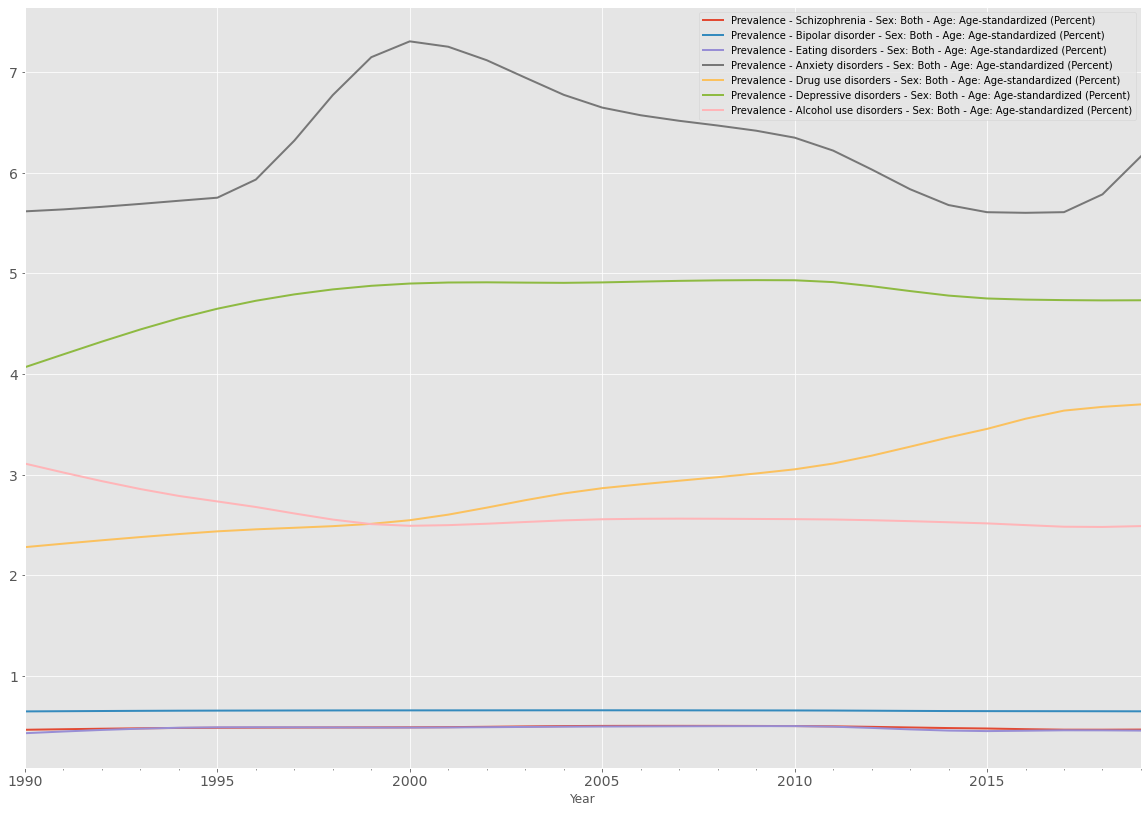

In [7]:
#Graph the diseases to see if there are any obvious trends
us_df.plot(figsize=(20, 14), linewidth=2, fontsize=14)


In [8]:
#Rename the Depression Disorders column
us_df['Depression_Rates'] = us_df['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)']

In [9]:
#Sanity Check
us_df

,Entity,Code,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),Depression_Rates
Year,,,,,,,,,,
1990-01-01,United States,USA,0.467115,0.649644,0.433047,5.617003,2.281317,4.068695,3.111360,4.068695
1991-01-01,United States,USA,0.472488,0.651606,0.450069,5.636548,2.316009,4.196610,3.022482,4.196610
1992-01-01,United States,USA,0.477502,0.653518,0.465582,5.661951,2.349570,4.323224,2.937071,4.323224
1993-01-01,United States,USA,0.481847,0.655238,0.478267,5.691142,2.381472,4.443956,2.858443,4.443956
1994-01-01,United States,USA,0.485216,0.656640,0.487285,5.722273,2.411349,4.554388,2.790028,4.554388
...,...,...,...,...,...,...,...,...,...,...
2015-01-01,United States,USA,0.479682,0.652400,0.454035,5.608664,3.456076,4.751602,2.517357,4.751602
2016-01-01,United States,USA,0.473109,0.652017,0.457696,5.602520,3.556867,4.740377,2.500322,4.740377
2017-01-01,United States,USA,0.467995,0.651626,0.461926,5.609053,3.637681,4.735252,2.484274,4.735252


<AxesSubplot:title={'center':'U.S. Depression Rates Over Time'}, xlabel='Year', ylabel='Depression Rates'>

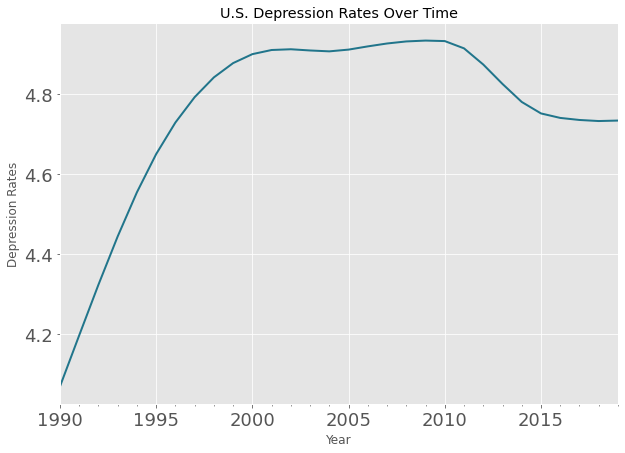

In [10]:
#Graph Only the Depression Rate
us_depression_rates= us_df['Depression_Rates']
us_depression_rates.plot(figsize=(10, 7), linewidth=2, fontsize=18, xlabel = None
                         , ylabel = "Depression Rates", title = "U.S. Depression Rates Over Time",
                         color = '#21758b',  )

In [11]:
#Use a Dicky-Fuller Test to test for stationarity
dftest = adfuller(us_depression_rates)

#Make the output look better
dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
)

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
display(dfoutput)

Test Statistic                 -1.613473
p-value                         0.476153
#Lags Used                      9.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

In [12]:
data_transform = pd.Series(np.log(us_depression_rates))

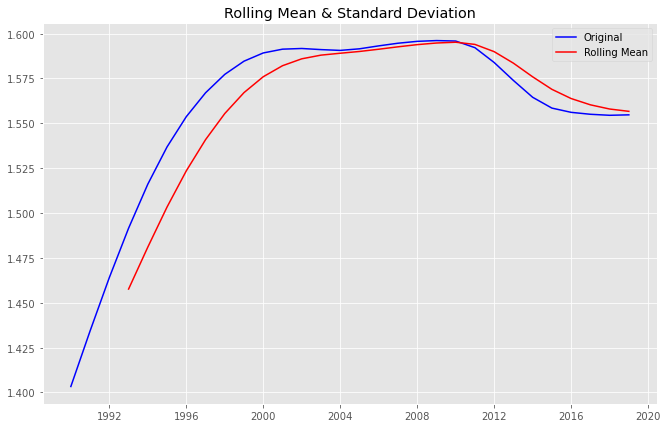

In [14]:
# Start with the square root transform to increase stationarity
data_transform = pd.Series(np.log(us_depression_rates))
#Subtract the rolling mean to increase stationarity
rolmean = data_transform.ewm(span = 4, min_periods = 4, adjust = False).mean()
fig = plt.figure(figsize=(11, 7))
orig = plt.plot(data_transform, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = data_transform - rolmean
data_minus_rolmean
# Drop the NaN values from timeseries calculated above 
# (the first few values didn't have a rolling mean)
data_minus_rolmean.dropna(inplace=True)

In [15]:
#Subtract the roling mean from above and drop null values
data_minus_rolmean = data_transform - rolmean
data_minus_rolmean
data_minus_rolmean.dropna(inplace=True)

In [16]:
#Sanity Check
data_minus_rolmean

Year
1993-01-01    0.033913
1994-01-01    0.035076
1995-01-01    0.033500
1996-01-01    0.030203
1997-01-01    0.026115
                ...   
2015-01-01   -0.010458
2016-01-01   -0.007694
2017-01-01   -0.005265
2018-01-01   -0.003499
2019-01-01   -0.001949
Name: Depression_Rates, Length: 27, dtype: float64

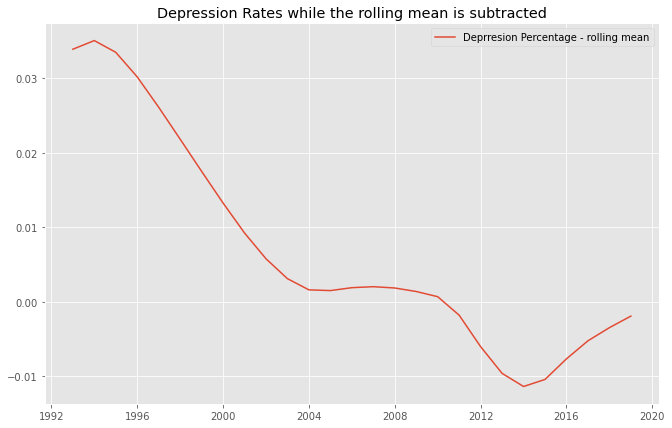

In [17]:
#Plot the new data
fig = plt.figure(figsize=(11, 7))
plt.plot(data_minus_rolmean, label='Deprresion Percentage - rolling mean')
plt.legend(loc='best')
plt.title('Depression Rates while the rolling mean is subtracted')
plt.show(block=False)

In [18]:
data_minus_rolmean

Year
1993-01-01    0.033913
1994-01-01    0.035076
1995-01-01    0.033500
1996-01-01    0.030203
1997-01-01    0.026115
                ...   
2015-01-01   -0.010458
2016-01-01   -0.007694
2017-01-01   -0.005265
2018-01-01   -0.003499
2019-01-01   -0.001949
Name: Depression_Rates, Length: 27, dtype: float64

In [19]:
#Use a Dicky-Fuller Test to test for stationarity
dftest = adfuller(data_minus_rolmean)

#Make the output look better
dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
)

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
display(dfoutput)

Test Statistic                 -5.211491
p-value                         0.000008
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

In [24]:
#Use a Dicky-Fuller Test to test for stationarity
dftest = adfuller(data_transform)

#Make the output look better
dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
)

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
display(dfoutput)

Test Statistic                 -1.734921
p-value                         0.413216
#Lags Used                      7.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64

Ultimately the log transformed data was used for this analysis because ARIMA models does not require the data to be stationary. This will also allow us to easily transform the data back to it's original number for forecasting 

## Modeling

#### Train-Test Split

In [25]:
# find the index which allows us to split off 20% of the data
cutoff = round(data_transform.shape[0]*0.8)
cutoff

24

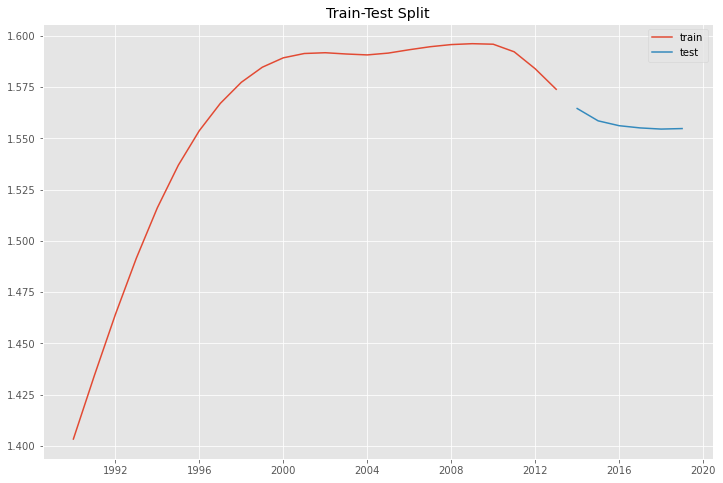

In [26]:
# Define train and test sets according to the index found above
train = data_transform[:cutoff]

test = data_transform[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [27]:
# Seperate some of the data in the training set for validation purposes
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[0 1 2 3] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23]


## Baseline Model

Prediction is based solely on previous reporting cycle data. This will give us a good idea if our model has predictive capacity. 

In [28]:
naive = train.shift(1)
naive

Year
1990-01-01         NaN
1991-01-01    1.403322
1992-01-01    1.434277
1993-01-01    1.464001
1994-01-01    1.491545
                ...   
2009-01-01    1.595675
2010-01-01    1.596109
2011-01-01    1.595853
2012-01-01    1.592155
2013-01-01    1.583896
Name: Depression_Rates, Length: 24, dtype: float64

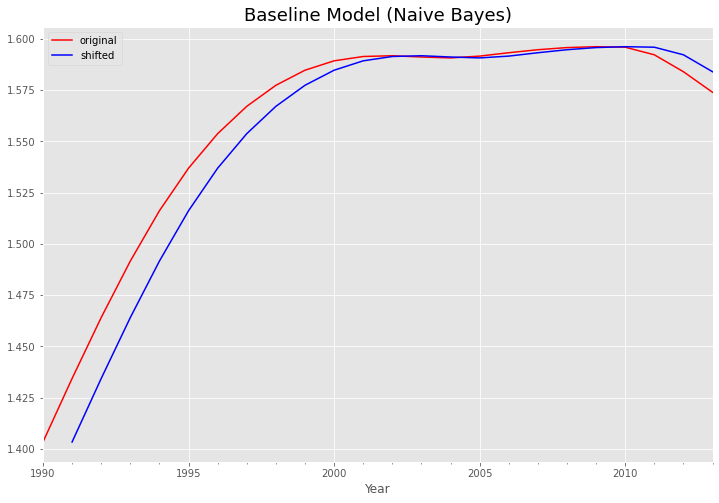

In [104]:
#Visual Demonstration of naive model
fig, ax = plt.subplots(figsize = (12,8))

train[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model (Naive Bayes)', fontsize = 18)
ax.legend();

In [30]:
#Root Mean Squared Error for Baseline
np.sqrt(mean_squared_error(train[1:], naive.dropna()))

0.013940508484064926

The baseline model RMSE is .014

### Testing different ARIMA models to see which has the lowest AIC

In [107]:
ar_1 = ARIMA(train, order=(1, 1, 0)).fit()
ar_1.summary()

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Depression_Rates   No. Observations:                   24
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  98.115
Date:                Thu, 14 Jul 2022   AIC                           -192.230
Time:                        04:45:00   BIC                           -189.959
Sample:                    01-01-1990   HQIC                          -191.659
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9081      0.052     17.466      0.000       0.806       1.010
sigma2      1.073e-05   5.62e-06      1.908      0.056   -2.93e-07    2.18e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):               135.10
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             2.98
Prob(H) (two-sided):                  0.06   Kurtosis:                        13.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
ar_2 = ARIMA(train, order=(2, 1, 0)).fit()

print(ar_2.aic)

-229.51251381479508


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [109]:
ar_3 = ARIMA(train, order=(2, 1, 0)).fit()

print(ar_2.aic)

-229.51251381479508


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [37]:
ar_2 = ARIMA(train, order=(2, 2, 1)).fit()

print(ar_2.aic)

-219.42490949606915


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [110]:
ar_4 = ARIMA(train, order=(3, 2, 1)).fit()

print(ar_2.aic)

-229.51251381479508


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [111]:
ar_5 = ARIMA(train, order=(4, 2, 1)).fit()

print(ar_2.aic)

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Johnn

-229.51251381479508


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


There does not seem to be a huge improvement using this method

## Using ACF and PACF 

A better way of going at this is by examining these charts. The ACF can tell us the optimal number of lags to go backwards and the PACF shows the direct effect of previous lags and thus the AR term for our model.

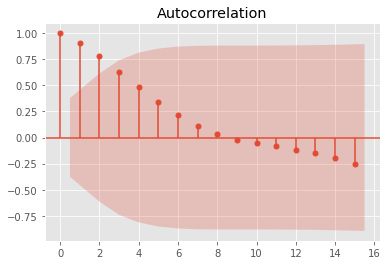

In [99]:
plot_acf(data_minus_rolmean); 

It appears that an MA of around two or three will be best in the final model as those lags still have some predictive capabilities. 

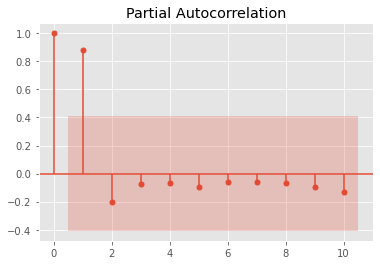

In [47]:
plot_pacf(train.diff().dropna(), lags = );

### Analysis
The ACF seems to drop around three while the PACF seems to be best at 1. While working through some other models that are not in the notebook, I noticed a trend in the PACF that there was significant correlation every four years. This interested me because something important and potentially stressful happens every four years. Presidential elections can be a stressful thing for people who are worried about their security and the economy and potentially trigger depression. 

For more research in this topic I suggest reading these articles (https://www.headspace.com/articles/election-anxiety, https://www.washingtonpost.com/lifestyle/wellness/stress-detox-election-anxiety/2020/11/09/96e5974c-1fa7-11eb-90dd-abd0f7086a91_story.html)

As a result of this finding, I wanted to use a SARIMA model that could incorporate a seasonality component in the model. 



## Model Iteration

I used a function that would allow me to grid search through a bunch of different parameters in my SARIMAX model in order to find the best one. The models were evaluated by their Akaike information criterion (AIC). This allowed me to determine the best model for this dataset. 

In [32]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],4) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train,
                         order=param,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(1, 0, 0, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(1, 0, 1, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(1, 1, 0, 4) - AIC:87.89433182538414
ARIMA(0, 0, 0)x(1, 1, 1, 4) - AIC:87.89433182538414
ARIMA(0, 0, 1)x(0, 0, 0, 4) - AIC:59.824320208563094
ARIMA(0, 0, 1)x(0, 0, 1, 4) - AIC:59.824320208563094
ARIMA(0, 0, 1)x(0, 1, 0, 4) - AIC:59.824320208563094


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(0, 0, 1)x(0, 1, 1, 4) - AIC:59.824320208563094
ARIMA(0, 0, 1)x(1, 0, 0, 4) - AIC:59.824320208563094
ARIMA(0, 0, 1)x(1, 0, 1, 4) - AIC:59.824320208563094


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(0, 0, 1)x(1, 1, 0, 4) - AIC:59.824320208563094
ARIMA(0, 0, 1)x(1, 1, 1, 4) - AIC:59.824320208563094
ARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(0, 1, 0, 4) - AIC:-127.90684779227996


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(0, 1, 0)x(0, 1, 1, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(1, 1, 0, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 0)x(1, 1, 1, 4) - AIC:-127.90684779227996
ARIMA(0, 1, 1)x(0, 0, 0, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:-138.66815292033223


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(0, 1, 1)x(0, 1, 0, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(0, 1, 1, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(1, 0, 0, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(1, 0, 1, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(1, 1, 0, 4) - AIC:-138.66815292033223
ARIMA(0, 1, 1)x(1, 1, 1, 4) - AIC:-138.66815292033223
ARIMA(1, 0, 0)x(0, 0, 0, 4) - AIC:-134.01119581238564

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\


ARIMA(1, 0, 0)x(0, 0, 1, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(0, 1, 0, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(0, 1, 1, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(1, 0, 0, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(1, 0, 1, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(1, 1, 0, 4) - AIC:-134.01119581238564
ARIMA(1, 0, 0)x(1, 1, 1, 4) - AIC:-134.01119581238564


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(1, 0, 1)x(0, 0, 0, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(0, 0, 1, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(0, 1, 0, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(0, 1, 1, 4) - AIC:-153.33175464913316


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(1, 0, 1)x(1, 0, 0, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(1, 0, 1, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(1, 1, 0, 4) - AIC:-153.33175464913316
ARIMA(1, 0, 1)x(1, 1, 1, 4) - AIC:-153.33175464913316


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(1, 1, 0)x(0, 0, 0, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(0, 0, 1, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(0, 1, 0, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(0, 1, 1, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(1, 0, 0, 4) - AIC:-210.21779722558088


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(1, 1, 0)x(1, 0, 1, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(1, 1, 0, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 0)x(1, 1, 1, 4) - AIC:-210.21779722558088
ARIMA(1, 1, 1)x(0, 0, 0, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(0, 0, 1, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(0, 1, 0, 4) - AIC:-217.19760742746027


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\

ARIMA(1, 1, 1)x(0, 1, 1, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(1, 0, 0, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(1, 0, 1, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(1, 1, 0, 4) - AIC:-217.19760742746027
ARIMA(1, 1, 1)x(1, 1, 1, 4) - AIC:-217.19760742746027


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


#### Analysis

The best model I found was with an order of (2, 1, 1) and a seasonal order of (0, 0, 1, 4)

In [77]:
#Cross validation for my training set before I apply it to the test set
#Reset the Index for easier validation
train_with_ind = train.reset_index()

for train_ind, val_ind in split.split(train_with_ind):
    sarimax = SARIMAX(endog=train_with_ind.iloc[train_ind, -1],
                      order=(2, 1, 1),
                     seasonal_order=(0, 0, 1, 4),
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\ba

0.05525329501129499
0.004856536739649589


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


0.0037555596738466294
0.000474664611816503
0.012926912557330056


C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The cross validation scores look good and is ready to be applied to the test set. It should be noted that the model does best in the middle of the data set were there was less variation, and worse in the beginning and end when rates were rising fastest and dropping rapidly.  

In [81]:
#Create a variable for the final model
sari_mod = SARIMAX(train
                   ,order = (2, 1, 1)
                   ,seasonal_order = (0,0,1,4)
                   ,enforce_stationarity=False
                   ,enforce_invertibility=False).fit()

#Use the fitted model to predict on the test set
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels')
#Print the RMSE for our test data
np.sqrt(mean_squared_error(test, y_hat_test))

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.0007408001705397787

#### Analysis
The RMSE for this model was .0007 as compared to the baseline model which was .013. This is a significant improvement in error reduction by 95%.

### Time Series Graphs

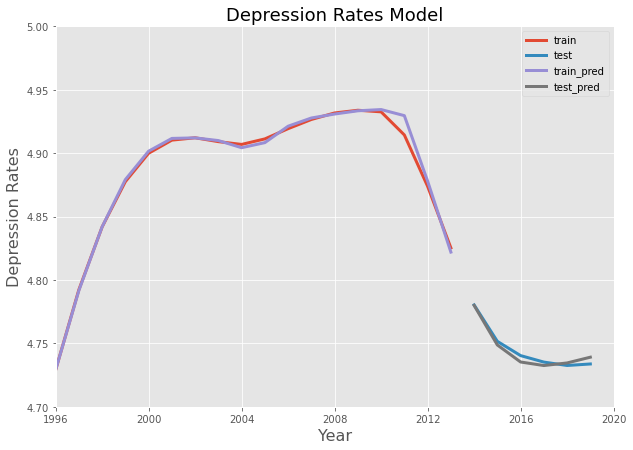

In [105]:
#Graphing the time series to get the full picture

#Defining variables for graph syntex
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots(figsize = (10, 7))
#The data is un-transformed by exponentiating the values. This undoes the log transformation
ax.plot(np.exp(train), label='train', lw = 3)
ax.plot(np.exp(test), label='test', lw = 3)
ax.plot(np.exp(y_hat_train), label='train_pred', lw = 3)
ax.plot(np.exp(y_hat_test), label='test_pred', lw = 3)
ax.set_title ('Depression Rates Model', fontsize = 18)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel("Depression Rates", fontsize = 16)
plt.xlim(pd.Timestamp('1996-01-01'), pd.Timestamp('2020-01-01'))
plt.ylim(4.7, 5)
plt.legend();

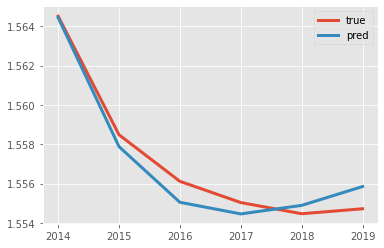

In [89]:
# Let's zoom in on test
fig, ax = plt.subplots()

ax.plot(test, label='true',lw = 3)
ax.plot(y_hat_test, label='pred', lw = 3)

plt.legend();

### Forecasting Into the Futre

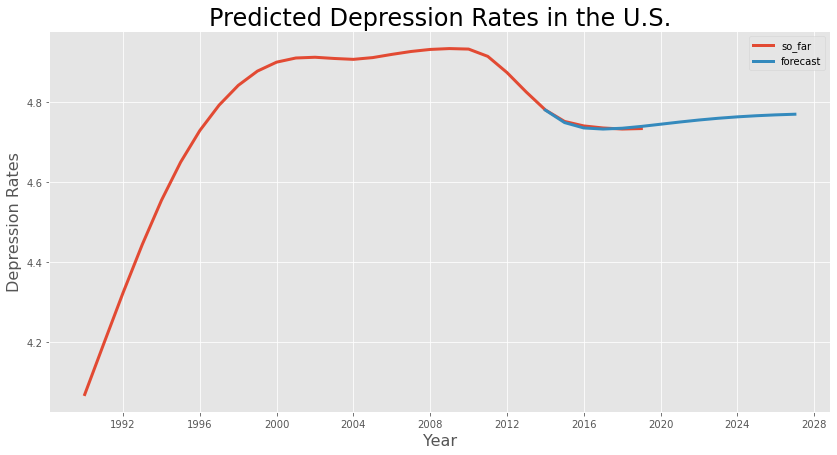

In [106]:
#Forecast out 8 years past the current dataset
forecast = sari_mod.forecast(steps=14)
fig, ax = plt.subplots(figsize = (14, 7))
ax.plot(us_depression_rates, label='so_far', lw = 3)
ax.plot(np.exp(forecast), label='forecast', lw = 3)
ax.set_title('Predicted Depression Rates in the U.S.', fontsize = 24)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel("Depression Rates", fontsize = 16)
plt.legend();

The model is predicting that rates will continue to grow for the foreseeable future. 

This is important to the CDC because it shows that the prevalence of this disesase is growing. This will allow them to better advocate for resources and expand outreach in order to curb it's spread. 

## Next Steps

In order to further assist the CDC, I would like to look at two more aspects of this dataset that could be useful to target outreach in communities that suffer from depression the most. 

Although this data looked at the U.S. population as a whole, it is also broken down into gender and age. Depression in youth is growing faster (https://www.pewresearch.org/fact-tank/2019/07/12/a-growing-number-of-american-teenagers-particularly-girls-are-facing-depression/#:~:text=The%20total%20number%20of%20teenagers,than%20for%20boys%20(44%25) and will have a bigger effect on those who suffer and the economy as a whole. This is due to higher lifetime treatment costs and lower economic potential.

Additionally, women are more likely to suffer from this disorder, and examining men and women separately may provide new insight into why. 

Finally, other disorders are linked to depression so including drug abuse, anxiety disorders, may farther improve the model's accuracy. 